In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import gzip
import scipy


In [2]:
from scipy.stats import binned_statistic

In [4]:
year = 2019
zfilln = 3 # for file names  

# set directories for results and comb contents
resultsdir = '/Volumes/JD-SSD/bees/beeresults2019/'
comb_contents_dir = '/Volumes/JD-SSD/bees/comb-contents-images2019/'

# If the files 'datafunctions.py', 'definitions_2019.py', and 'displayfunctions.py' are in a different folder, need to cd there so can import them
#%cd 'directory-with-py-files'

import definitions_2019 as bd  
import displayfunctions as bp  # 'bee plots'
import datafunctions as dfunc
# import data_and_embedding
dfunc.init(bd) 
bp.init(bd)
# import data_and_embedding2019 as de  # data_and_embedding2019.py
bd.year

2019

# Heat trial days - show comb

In [5]:
# the first day is the test day, to figure out the experiment, show the trial days
bd.heatdays[1:]

array([79, 81, 87, 93, 96])

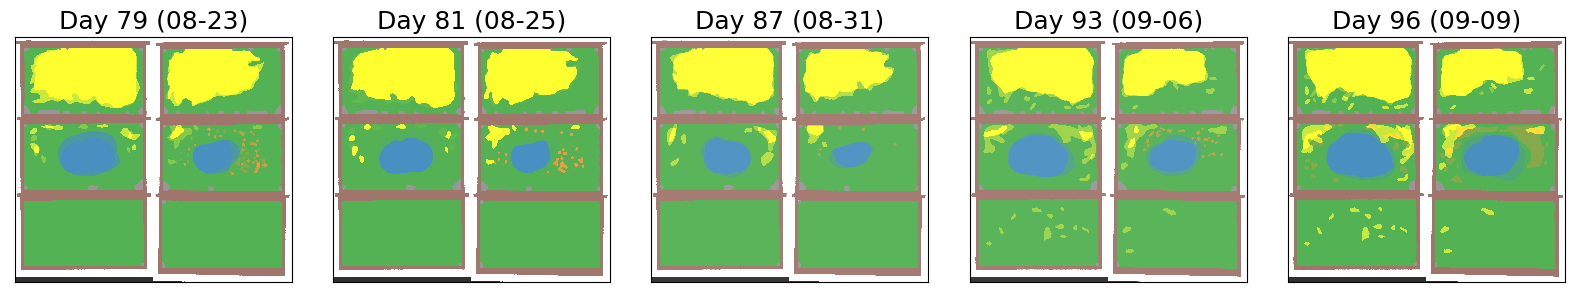

In [38]:
## To show in a single row
daystoshow = bd.heatdays[1:]

numrows=1
numcols=len(daystoshow)

f,ax = plt.subplots(numrows,numcols,sharex=True,sharey=True)
basesize=4
fontsize=18
f.set_size_inches(basesize*numcols,basesize*numrows*(bd.ypixels/(2*bd.xpixels)))

for i,daynum in enumerate(daystoshow):    
    a = ax if len(daystoshow)==1 else ax[i]
    comb = pickle.load(gzip.open(comb_contents_dir+'comb_'+str(daynum).zfill(zfilln)+'.pklz','rb'))
    bp.showcomb(comb,ax=a)
    a.set_title('Day '+str(daynum)+ ' ('+bp.showmonthday(bd.alldaytimestamps[daynum])+')',fontsize=fontsize)

# legend hack
a = ax[-1] if len(daystoshow)>1 else ax
for i in range(len(bd.substrate_names)-2):
    if i==5:  # dance floor
#             a.plot(0,0,label='Dances observed',c=bd.cmap_comb(i),lw=5)
        None
#         a.plot(0,0,label='Dance floor (combined)',linestyle='--',lw=5,c=bd.cmap_comb(i))        
    else:
        a.plot(0,0,label=bd.substrate_names[i],c=bd.cmap_comb(i),lw=5)
# a.legend(fontsize=fontsize,bbox_to_anchor=(1, 1.04),loc='upper left')


plt.subplots_adjust(wspace=0.15)
plt.savefig('../image-output/fig1-nest-maps.png',dpi=300)
plt.savefig('../image-output/fig1-nest-maps.pdf',dpi=300)
plt.show()

# Temperature

In [7]:
temp_data = pd.read_csv('all_heat_trials_temp_loggers.csv')

In [8]:
temp_all_sensors = [[temp_data[(temp_data['heat_trial'] == i) & (temp_data['location'] == j)]['temp'].values for i in [2,3,4,5,6]] for j in temp_data['location'].unique()[1:-1]]

In [9]:
time = [temp_data[(temp_data['heat_trial'] == i) & (temp_data['location'] == 'mid_brood')]['time_from_heat10am'].values for i in [2,3,4,5,6]]
time = np.array(time)
time = np.mean(time,axis=0)

In [10]:
time

array([-103942. , -103931.6, -103921.6, ...,  163983.4,  163993.8,
        164004.2])

# Range

In [11]:
bin_seconds = np.arange(-3600*3, 3600*10, 30)

In [12]:
temp_data['location'].unique()[1:-1]

array(['top_honey', 'tunnel_close', 'tunnel_outside', 'air_room',
       'lower_frame', 'mid_capped_brood', 'tunnel_mid', 'mid_brood'],
      dtype=object)

# Individual trials

In [35]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

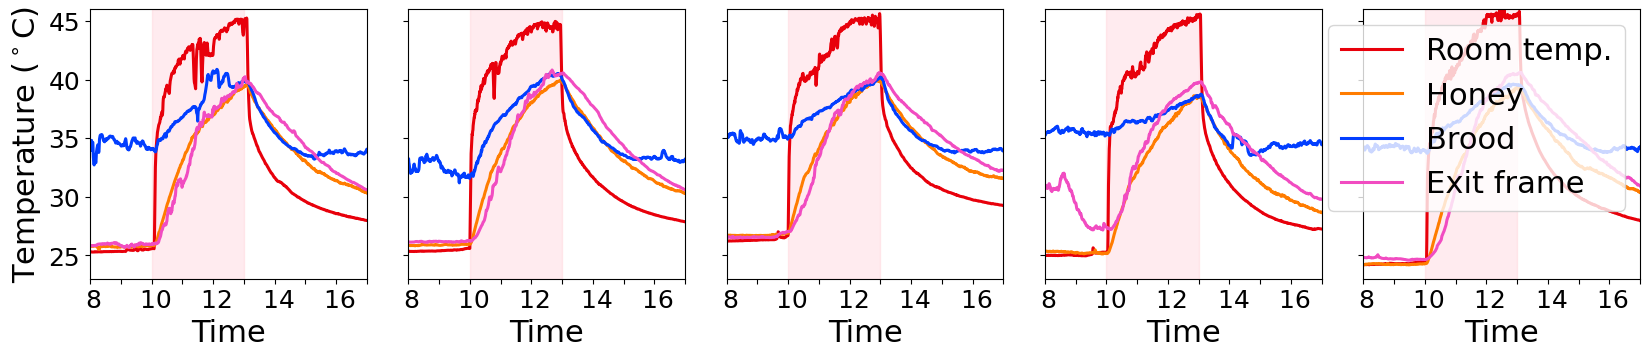

In [47]:
f, ax = plt.subplots(1,5,sharey=True)
f.set_facecolor('white')
f.set_size_inches(20,3.5)
colors = ['Red','yellow','Blue','Green']
colors = np.array(sns.color_palette('bright'))[[3,1,0,6]]
# colors[3] = np.tile(0.4,3)
lw=2.2
for j in [0,1,2,3,4]:
    trial = j
    bin_temp_single_trial = [binned_statistic(time,temp_all_sensors[i][trial],bins=bin_seconds,statistic=(lambda x: np.nanmean(x)))[0] for i in range(len(temp_all_sensors))]
    for c,i in enumerate([3,0,7,4]):#range(len(bin_temp_single_trial)):
        # manual corrections for temperature loggers
        if j == 1:
            ax[j].plot(bin_seconds[0:-1]/60+33,bin_temp_single_trial[i],linewidth=lw,color=colors[c])
        elif j == 2:
            ax[j].plot(bin_seconds[0:-1]/60-20,bin_temp_single_trial[i],linewidth=lw,color=colors[c])
        elif j == 3:
            ax[j].plot(bin_seconds[0:-1]/60+12,bin_temp_single_trial[i],linewidth=lw,color=colors[c])
        elif j == 4:
            ax[j].plot(bin_seconds[0:-1]/60-12,bin_temp_single_trial[i],linewidth=lw,color=colors[c])
        else:
            ax[j].plot(bin_seconds[0:-1]/60,bin_temp_single_trial[i],linewidth=lw,color=colors[c])
    if j == 0:
        ax[j].set_ylabel('Temperature ($^\circ$C)',fontsize=22)
    ax[j].set_xlabel('Time',fontsize=22)
    ax[j].set_ylim([23,46])
    ax[j].set_xticks(np.arange(-180,600,60))
    ax[j].set_xticklabels(['7',' 8','',' 10','',' 12','',' 14','',' 16','',' 18',' 19'])
    ax[j].tick_params(axis='both', which='major', labelsize=18)
    ax[j].set_xlim([-120,420])
    ax[j].axvspan(0,180,alpha=0.3,color='pink')
plt.legend(['Room temp.','Honey','Brood','Exit frame'],fontsize=22)
plt.subplots_adjust(wspace=0.15)
plt.savefig('../image-output/fig1-temp2.pdf')
plt.show()